# Diabetes Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, classification_report, recall_score, f1_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Cross validation and Grid Search libraries
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [2]:
my_data = pd.read_csv('diabetes.csv')
my_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Pre-processing

### Data Cleaning

In [3]:
# Checking for duplicates
my_data.duplicated().sum()

0

In [4]:
# Checking for na values
my_data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# Checking for null values
my_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Checking for unique values in target variable
my_data['Outcome'].unique()

array([1, 0], dtype=int64)

### Checking class imbalance

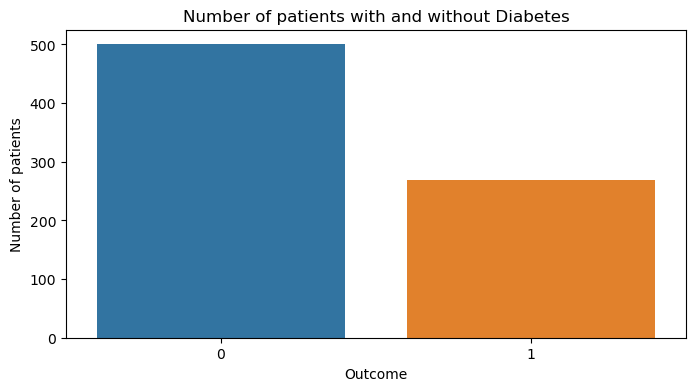

In [7]:
#Setting figure size
plt.figure(figsize=(8,4))
#Plotting the countplot
sns.countplot(x='Outcome', data=my_data)
#Setting rotation for x-axis values
#plt.xticks(rotation=90)
plt.xlabel("Outcome") 
plt.ylabel("Number of patients")
plt.title("Number of patients with and without Diabetes")
plt.show() 

### Split the data into train and validation sets

In [8]:
X = my_data.drop('Outcome', axis=1)
y = my_data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_test.to_csv('X_test.csv', index=False)

### Oversampling using SMOTE

In [10]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

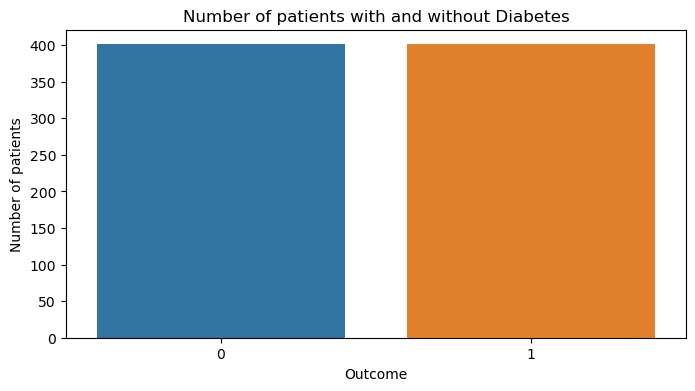

In [11]:
#Setting figure size
plt.figure(figsize=(8,4))
#Plotting the countplot
sns.countplot(x=y_train_resampled)
#Setting rotation for x-axis values
#plt.xticks(rotation=90)
plt.xlabel("Outcome") 
plt.ylabel("Number of patients")
plt.title("Number of patients with and without Diabetes")
plt.show() 

### Scaling Data

In [12]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform training set
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test set using the same scaler
X_test_scaled = scaler.transform(X_test)

## Machine Learing Models

### Logistic Regression

In [13]:
# Logistic Regression
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train_resampled_scaled, y_train_resampled)
y_pred_LogisticRegression = model_LogisticRegression.predict(X_test_scaled)

In [14]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LogisticRegression))


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.74        99
           1       0.56      0.71      0.62        55

    accuracy                           0.69       154
   macro avg       0.68      0.70      0.68       154
weighted avg       0.72      0.69      0.70       154



In [15]:
# Accuracy
Accuracy_LogisticRegression = accuracy_score(y_test, y_pred_LogisticRegression)
print("Accuracy:", round(Accuracy_LogisticRegression,2))
# Precision
Precision_LogisticRegression = precision_score(y_test, y_pred_LogisticRegression, average='binary')
print("Precision Score:", round(Precision_LogisticRegression,2))
# Recall
recall_LogisticRegression = recall_score(y_test, y_pred_LogisticRegression, average='binary')
print("Recall Score :", round(recall_LogisticRegression,2))
# f1_score
f1_score_LogisticRegression = f1_score(y_test, y_pred_LogisticRegression, average='binary')
print("f1 Score :", round(f1_score_LogisticRegression,2))

Accuracy: 0.69
Precision Score: 0.56
Recall Score : 0.71
f1 Score : 0.62


### KNN

In [16]:
# Hyperparameter Tuning
KNN_optimal_parms_accuracy={}
for i in range(1,21):
    # Train Model
    model_KNN = KNeighborsClassifier(n_neighbors=i)
    model_KNN.fit(X_train_resampled_scaled, y_train_resampled)
    #Predict the results
    y_pred_KNN = model_KNN.predict(X_test_scaled)
    # Accuracy
    acc = accuracy_score(y_test, y_pred_KNN)
    # Appending to dict
    KNN_optimal_parms_accuracy[i] = acc
    
optimal_params_KNN = max(KNN_optimal_parms_accuracy, key=KNN_optimal_parms_accuracy.get)
print("Optimal value for param n_neighbors is : ",optimal_params_KNN)
print("Maximum Accuracy is : ", KNN_optimal_parms_accuracy[optimal_params_KNN])

Optimal value for param n_neighbors is :  11
Maximum Accuracy is :  0.7142857142857143


In [17]:
model_KNN = KNeighborsClassifier(n_neighbors=11)
model_KNN.fit(X_train_resampled_scaled, y_train_resampled)
#Predict the results
y_pred_KNN = model_KNN.predict(X_test_scaled)

In [18]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_KNN))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.71      0.76        99
           1       0.58      0.73      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.72       154



In [19]:
# Precision
Accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("Accuracy:", round(Accuracy_KNN,2))
# Precision
Precision_KNN = precision_score(y_test, y_pred_KNN, average='binary')
print("Precision Score:", round(Precision_KNN,2))
# Recall
recall_KNN = recall_score(y_test, y_pred_KNN, average='binary')
print("Recall Score:", round(recall_KNN,2))
# f1_score
f1_score_KNN = f1_score(y_test, y_pred_KNN, average='binary')
print("f1 Score:", round(f1_score_KNN,2))

Accuracy: 0.71
Precision Score: 0.58
Recall Score: 0.73
f1 Score: 0.65


### SVM

In [20]:
# Hyperparameter Tuning
SVM_optimal_parms_accuracy={}
for i in [0.1,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,50]:
    # Train Model
    model_svc = SVC(C=i, random_state=42) 
    model_svc.fit(X_train_resampled_scaled, y_train_resampled)
    #Predict the results
    y_pred_SVC = model_svc.predict(X_test_scaled)
    # Accuracy
    acc = accuracy_score(y_test, y_pred_SVC)
    # Appending to dict
    SVM_optimal_parms_accuracy[i] = acc
    
optimal_params_SVM = max(SVM_optimal_parms_accuracy, key=SVM_optimal_parms_accuracy.get)
print("Optimal value for param C is : ",optimal_params_SVM)
print("Maximum Accuracy is : ", SVM_optimal_parms_accuracy[optimal_params_SVM])

Optimal value for param C is :  1
Maximum Accuracy is :  0.7142857142857143


In [21]:
# Train Model
model_svc = SVC(C=1, random_state=42) 
model_svc.fit(X_train_resampled_scaled, y_train_resampled)
# Prediction
y_pred_SVC = model_svc.predict(X_test_scaled)

In [22]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_SVC))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [23]:
# Accuracy
Accuracy_SVC = accuracy_score(y_test, y_pred_SVC)
print("Accuracy:", round(Accuracy_SVC,2))
# Precision
Precision_SVC = precision_score(y_test, y_pred_SVC, average='binary')
print("Precision Score:", round(Precision_SVC,2))
# Recall
recall_SVC = recall_score(y_test, y_pred_SVC, average='binary')
print("Recall Score:", round(recall_SVC,2))
# f1_score
f1_score_SVC = f1_score(y_test, y_pred_SVC, average='binary')
print("f1 Score:", round(f1_score_SVC,2))

Accuracy: 0.71
Precision Score: 0.59
Recall Score: 0.67
f1 Score: 0.63


### Decision Tree

In [24]:
# Hyperparameter Tuning
DT_optimal_parms_accuracy={}
for i in range(1,21):
    # Train Model
    model_DecisionTree = DecisionTreeClassifier(max_depth=i, random_state=42)
    model_DecisionTree.fit(X_train_resampled_scaled, y_train_resampled)
    # Prediction
    y_pred_DecisionTree = model_DecisionTree.predict(X_test_scaled)
    # Accuracy
    acc = accuracy_score(y_test, y_pred_DecisionTree)
    # Appending to dict
    DT_optimal_parms_accuracy[i] = acc
    
optimal_params_DT = max(DT_optimal_parms_accuracy, key=DT_optimal_parms_accuracy.get)
print("Optimal value for param max_depth is : ",optimal_params_DT)
print("Maximum Accuracy is : ", DT_optimal_parms_accuracy[optimal_params_DT])

Optimal value for param max_depth is :  6
Maximum Accuracy is :  0.7727272727272727


In [25]:
# Train Model
model_DecisionTree = DecisionTreeClassifier(max_depth=6, random_state=42)
model_DecisionTree.fit(X_train_resampled_scaled, y_train_resampled)
# Prediction
y_pred_DecisionTree = model_DecisionTree.predict(X_test_scaled)

In [26]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_DecisionTree))


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82        99
           1       0.67      0.73      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [27]:
# Accuracy
Accuracy_DecisionTree = accuracy_score(y_test, y_pred_DecisionTree)
print("Accuracy : ", round(Accuracy_DecisionTree,2))
# Precision
Precision_DecisionTree = precision_score(y_test, y_pred_DecisionTree, average='binary')
print("Precision Score : ", round(Precision_DecisionTree,2))
# Recall
recall_DecisionTree = recall_score(y_test, y_pred_DecisionTree, average='binary')
print("Recall Score : ", round(recall_DecisionTree,2))
# f1_score
f1_score_DecisionTree = f1_score(y_test, y_pred_DecisionTree, average='binary')
print("f1 Score : ", round(f1_score_DecisionTree,2))

Accuracy :  0.77
Precision Score :  0.67
Recall Score :  0.73
f1 Score :  0.7


<Axes: >

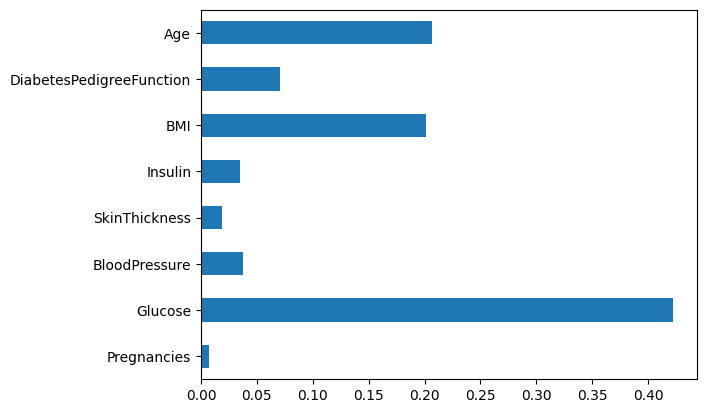

In [28]:
# Feature Importance
pd.Series(model_DecisionTree.feature_importances_, index=X.columns).plot(kind='barh')

### Random Forest

In [29]:
# Hyperparameter Tuning
RF_optimal_parms_accuracy={}
for i in range(1,21):
    for j in range(5,101,5):
        # Train Model
        model_RandomForest = RandomForestClassifier(max_depth = i, n_estimators = j, random_state=42)
        model_RandomForest.fit(X_train_resampled_scaled, y_train_resampled)
        # Prediction
        y_pred_RandomForest = model_RandomForest.predict(X_test_scaled)
        # Accuracy
        acc = accuracy_score(y_test, y_pred_RandomForest)
        # Appending to dict
        RF_optimal_parms_accuracy[i,j] = acc
    
optimal_params_RF = max(RF_optimal_parms_accuracy, key=RF_optimal_parms_accuracy.get)
print("Optimal values for param max_depth, n_estimators are : ",optimal_params_RF)
print("Maximum Accuracy is : ", RF_optimal_parms_accuracy[optimal_params_RF])

Optimal values for param max_depth, n_estimators are :  (7, 95)
Maximum Accuracy is :  0.7792207792207793


In [30]:
# Train the model
model_RandomForest = RandomForestClassifier(max_depth = 7, n_estimators = 95, random_state=42)
model_RandomForest.fit(X_train_resampled_scaled, y_train_resampled)
#Prediction
y_pred_RandomForest = model_RandomForest.predict(X_test_scaled)      

In [31]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RandomForest))


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.66      0.78      0.72        55

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.79      0.78      0.78       154



In [32]:
# Accuracy
Accuracy_RandomForest = accuracy_score(y_test, y_pred_RandomForest)
print("Accuracy:", round(Accuracy_RandomForest,2))
# Precision
Precision_RandomForest = precision_score(y_test, y_pred_RandomForest, average='binary')
print("Precision Score:", round(Precision_RandomForest,2))
# Recall
recall_RandomForest = recall_score(y_test, y_pred_RandomForest, average='binary')
print("Recall Score:", round(recall_RandomForest,2))
# f1_score
f1_score_RandomForest = f1_score(y_test, y_pred_RandomForest, average='binary')
print("f1 Score:", round(f1_score_RandomForest,2))

Accuracy: 0.78
Precision Score: 0.66
Recall Score: 0.78
f1 Score: 0.72


<Axes: >

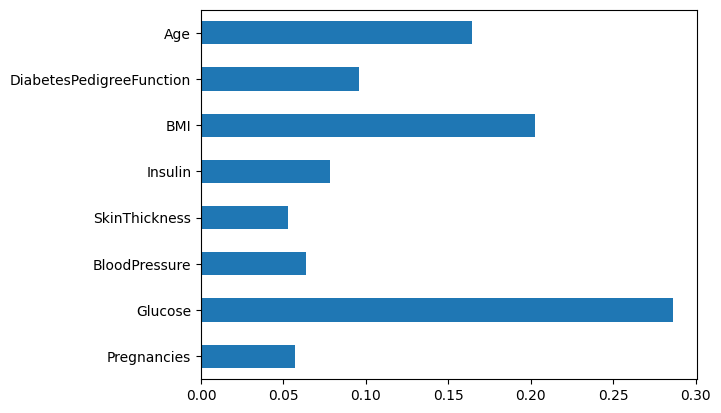

In [33]:
# Feature Importance
pd.Series(model_RandomForest.feature_importances_, index=X.columns).plot(kind='barh')

### GBM

In [34]:
# Hyperparameter Tuning
GBM_optimal_parms_accuracy={}
for i in range(1,21):
    for j in range(5,101,5):
        # Train Model
        model_GBM = GradientBoostingClassifier(max_depth=i, n_estimators=j, random_state=42)
        model_GBM.fit(X_train_resampled_scaled, y_train_resampled)
        #Predict the results
        y_pred_GBM = model_GBM.predict(X_test_scaled)
        # Accuracy
        acc = accuracy_score(y_test, y_pred_GBM)
        # Appending to dict
        GBM_optimal_parms_accuracy[i,j] = acc
    
optimal_params_GBM = max(GBM_optimal_parms_accuracy, key=GBM_optimal_parms_accuracy.get)
print("Optimal values for param max_depth, n_estimators are : ",optimal_params_GBM)
print("Maximum Accuracy is : ", GBM_optimal_parms_accuracy[optimal_params_GBM])

Optimal values for param max_depth, n_estimators are :  (1, 75)
Maximum Accuracy is :  0.7662337662337663


In [35]:
# Train Model
model_GBM = GradientBoostingClassifier(max_depth=1, n_estimators=75, random_state=42)
model_GBM.fit(X_train_resampled_scaled, y_train_resampled)
# Prediction
y_pred_GBM = model_GBM.predict(X_test_scaled)

In [36]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_GBM))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        99
           1       0.65      0.76      0.70        55

    accuracy                           0.77       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.77      0.77       154



In [37]:
# Accuracy
Accuracy_GBM = accuracy_score(y_test, y_pred_GBM)
print("Accuracy:", round(Accuracy_GBM,2))
# Precision
Precision_GBM = precision_score(y_test, y_pred_GBM, average='binary')
print("Precision Score:", round(Precision_GBM,2))
# Recall
recall_GBM = recall_score(y_test, y_pred_GBM, average='binary')
print("Recall Score:", round(recall_GBM,2))
# f1_score
f1_score_GBM = f1_score(y_test, y_pred_GBM, average='binary')
print("f1 Score:", round(f1_score_GBM,2))

Accuracy: 0.77
Precision Score: 0.65
Recall Score: 0.76
f1 Score: 0.7


<Axes: >

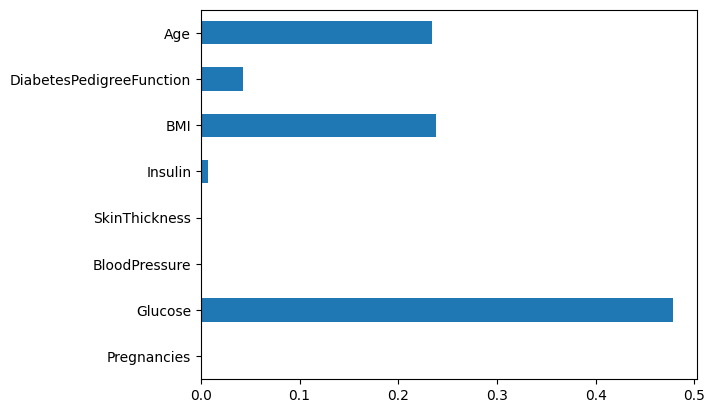

In [38]:
# Feature Importance
pd.Series(model_GBM.feature_importances_, index=X.columns).plot(kind='barh')

## XGB

In [39]:
# Hyperparameter Tuning
XGB_optimal_parms_accuracy={}
for i in range(1,21):
    for j in range(5,101,5):
        for k in [0.01, 0.05, 0.1]:
            # Train Model
            model_XGB = XGBClassifier(max_depth=i, n_estimators=j, learning_rate=k, random_state=42)
            model_XGB.fit(X_train_resampled_scaled, y_train_resampled)
            #Predict the results
            y_pred_XGB = model_XGB.predict(X_test_scaled)
            # Accuracy
            acc = accuracy_score(y_test, y_pred_XGB)
            # Appending to dict
            XGB_optimal_parms_accuracy[i,j,k] = acc
    
optimal_params_XGB = max(XGB_optimal_parms_accuracy, key=XGB_optimal_parms_accuracy.get)
print("Optimal values for param max_depth, n_estimators and learning_rate are : ",optimal_params_XGB)
print("Maximum Accuracy is : ", XGB_optimal_parms_accuracy[optimal_params_XGB])

Optimal values for param max_depth, n_estimators and learning_rate are :  (1, 90, 0.01)
Maximum Accuracy is :  0.7727272727272727


In [40]:
# Train Model
model_XGB = XGBClassifier(max_depth=1, n_estimators=90, learning_rate=0.01, random_state=42)
model_XGB.fit(X_train_resampled_scaled, y_train_resampled)
#Predict the results
y_pred_XGB = model_XGB.predict(X_test_scaled)

In [41]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_XGB))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        99
           1       0.67      0.71      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.76       154
weighted avg       0.78      0.77      0.77       154



In [42]:
# Precision
Accuracy_XGB = accuracy_score(y_test, y_pred_XGB)
print("Accuracy:", round(Accuracy_XGB,2))
# Precision
Precision_XGB = precision_score(y_test, y_pred_XGB, average='binary')
print("Precision Score:", round(Precision_XGB,2))
# Recall
recall_XGB = recall_score(y_test, y_pred_XGB, average='binary')
print("Recall Score:", round(recall_XGB,2))
# f1_score
f1_score_XGB = f1_score(y_test, y_pred_XGB, average='binary')
print("f1 Score:", round(f1_score_XGB,2))

Accuracy: 0.77
Precision Score: 0.67
Recall Score: 0.71
f1 Score: 0.69


<Axes: >

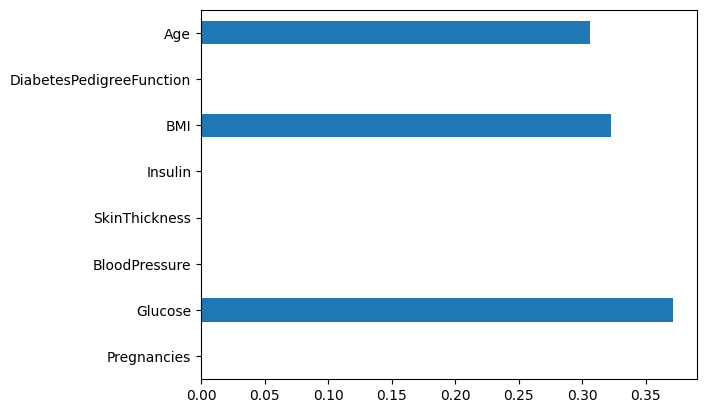

In [43]:
# Feature Importance
pd.Series(model_XGB.feature_importances_, index=X.columns).plot(kind='barh')

### Machine Learning Models Perfromance

<Figure size 1000x600 with 0 Axes>

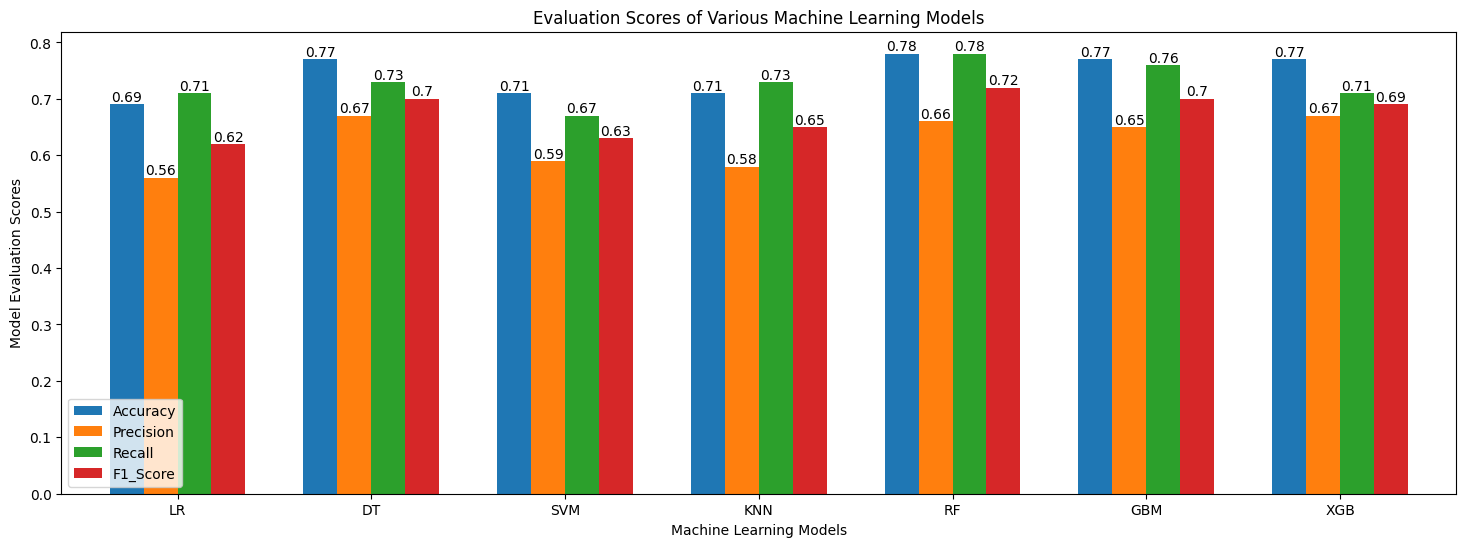

In [44]:
#Creating the list of models
ML_Models = ['LR', 'DT', 'SVM', 'KNN', 'RF', 'GBM', 'XGB']
#Creating the list of r2 scores of models of different analysis
Accuracy = [0.69, 0.77, 0.71, 0.71, 0.78, 0.77, 0.77]
Precision = [0.56, 0.67, 0.59, 0.58, 0.66, 0.65, 0.67]
Recall = [0.71, 0.73, 0.67, 0.73, 0.78, 0.76, 0.71]
F1_Score = [0.62, 0.70, 0.63, 0.65, 0.72, 0.70, 0.69]
#Creating data frame
scores_=pd.DataFrame({
    'Accuracy' : Accuracy,
    'Precision' : Precision,
    'Recall' : Recall,
    'F1_Score' : F1_Score},
    index=ML_Models
)

#Plotting the results
plt.figure(figsize = (10, 6))
ax=scores_.plot(kind='bar', width=0.7, figsize=(18,6))

plt.xlabel("Machine Learning Models")
plt.ylabel("Model Evaluation Scores")
plt.title("Evaluation Scores of Various Machine Learning Models")
#Setting roration for x-axis values
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

## Best Model

In [16]:
X_train_resampled_copy= X_train_resampled.copy(deep=True)
X_test_copy = X_test.copy(deep=True)

In [19]:
X_train_resampled_copy.drop('Pregnancies', axis=1, inplace=True)
X_train_resampled_copy

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,84,0,0,0,0.000000,0.304000,21
1,112,82,24,0,28.200000,1.282000,50
2,139,46,19,83,28.700000,0.654000,22
3,161,50,0,0,21.900000,0.254000,65
4,134,80,37,370,46.200000,0.238000,46
...,...,...,...,...,...,...,...
797,113,66,0,0,32.790691,0.258326,42
798,148,82,45,231,38.583317,0.911017,48
799,126,68,26,115,29.775283,0.208946,37
800,141,0,0,0,42.612697,0.255220,29


In [20]:
X_test_copy.drop('Pregnancies', axis=1, inplace=True)
X_test_copy

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,98,58,33,190,34.0,0.430,43
324,112,75,32,0,35.7,0.148,21
624,108,64,0,0,30.8,0.158,21
690,107,80,0,0,24.6,0.856,34
473,136,90,0,0,29.9,0.210,50
...,...,...,...,...,...,...,...
355,165,88,0,0,30.4,0.302,49
534,77,56,30,56,33.3,1.251,24
344,95,72,0,0,36.8,0.485,57
296,146,70,38,360,28.0,0.337,29


In [27]:
### Random Forest
# Train the model
model_RandomForest = RandomForestClassifier(max_depth = 7, n_estimators = 95, random_state=42)
model_RandomForest.fit(X_train_resampled, y_train_resampled)
#Prediction
y_pred_RandomForest = model_RandomForest.predict(X_test)      

In [28]:
# Accuracy
Accuracy_RandomForest = accuracy_score(y_test, y_pred_RandomForest)
print("Accuracy:", round(Accuracy_RandomForest,2))
# Precision
Precision_RandomForest = precision_score(y_test, y_pred_RandomForest, average='binary')
print("Precision Score:", round(Precision_RandomForest,2))
# Recall
recall_RandomForest = recall_score(y_test, y_pred_RandomForest, average='binary')
print("Recall Score:", round(recall_RandomForest,2))
# f1_score
f1_score_RandomForest = f1_score(y_test, y_pred_RandomForest, average='binary')
print("f1 Score:", round(f1_score_RandomForest,2))

Accuracy: 0.78
Precision Score: 0.66
Recall Score: 0.78
f1 Score: 0.72


<Axes: >

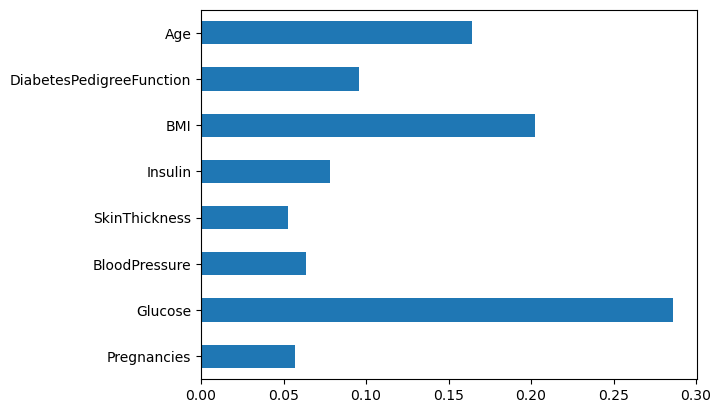

In [29]:
# Feature Importance
pd.Series(model_RandomForest.feature_importances_, index=X.columns).plot(kind='barh')

### Save the Best Model

In [48]:
# Saving the trained model
import joblib
joblib.dump(model_RandomForest, "model_RandomForest.joblib")

['model_RandomForest.joblib']

In [49]:
y_pred_RandomForest

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0])